In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy

Parte I – Projetos (por métodos algébricos) de filtros IIR baseados em Modelos Analógicos

In [2]:
# Exercicio 1
T = 0.02
fc = 1 # hz
wc = 2*np.pi*fc

In [3]:
a1 = T*wc - 1
b1 = T*wc 

In [4]:
import control

In [5]:
# y/x = b1*z**(-1) / (1 + a1*z**(-1)) = b1 / (z + a1)
FiltroPBZ = control.TransferFunction(b1, [1, a1], T)
FiltroPBZ

TransferFunction(array([0.12566371]), array([ 1.        , -0.87433629]), 0.02)

In [6]:
b1

0.12566370614359174

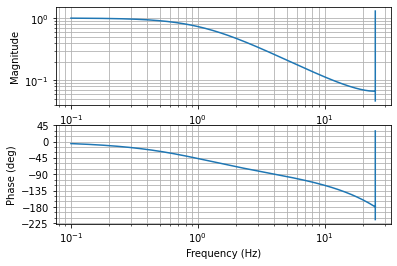

In [7]:
control.bode_plot(FiltroPBZ, Hz = True);

Text(0.5, 1.0, 'Sinal a ser filtrado')

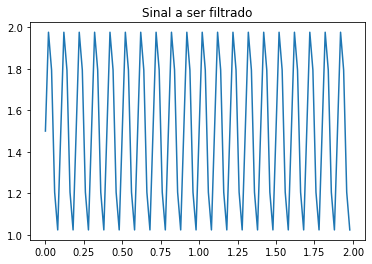

In [8]:
tsim = np.arange(0,2,0.02)
sinal = []
for t in tsim:
    sinal.append(1.5 + 0.5*np.sin(2*np.pi*10*t))

plt.plot(tsim, sinal)
plt.title("Sinal a ser filtrado")

In [9]:
mediaEnt = np.mean(sinal)
print(mediaEnt)

1.4999999999999998


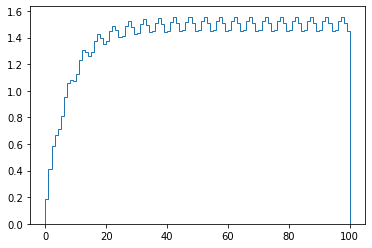

In [10]:
# Filtrando o sinal usando os valores de a e b e a função lfilter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Precisa usar 1 para o a0, olhar documentação
sinalFiltrado = signal.lfilter([b1], [1, a1], sinal) 
plt.stairs(sinalFiltrado)

In [11]:
# Calcular a media do sinalFiltrado
media = np.mean(sinalFiltrado[40:-1])
print("Media do sinal filtrado: ", media)

Media do sinal filtrado:  1.5000324902989217


In [12]:
# Considerando o filtro ideal, e que a frequência de corte é de 1Hz
# Na freq. de 10Hz, ou seja, uma decada depois, teriamos um atenuamento
# de -20dB, ou seja, 1/10 da amplitude original

In [13]:
# Não, pois ainda temos influencia do ruído na saída, deveriamos 
# ter um filtro com frequencia de corte menor

In [14]:
Wc2 = 2*np.pi*1
T = T
Fs = 1/T

num = [Wc2 ** 2]
den = [1, 2*Wc2, Wc2**2]

In [15]:
# Projeta um filtro usando a função bilinear 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bilinear.html
# Retorna os coeficientes do filtro
b2, a2 = signal.bilinear(num, den, Fs)

In [16]:
#Printa os coeficientes b2 e a2
print("b2: ", b2)
print("a2: ", a2)

b2:  [0.00349487 0.00698973 0.00349487]
a2:  [ 1.         -1.76353041  0.77750988]


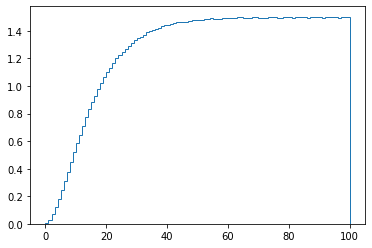

In [17]:
sinalFiltrado2 = signal.lfilter(b2, a2, sinal) 
plt.stairs(sinalFiltrado2)

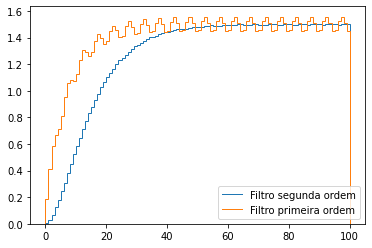

In [18]:
plt.stairs(sinalFiltrado2, label="Filtro segunda ordem")
plt.stairs(sinalFiltrado, label="Filtro primeira ordem")
plt.legend(loc = 4)

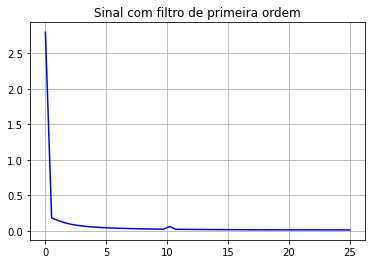

In [19]:
# Plot fft of sinalFiltrado3
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
N = len(sinalFiltrado)
T = T
yf = scipy.fft.fft(sinalFiltrado)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color = 'blue')
plt.title("Sinal com filtro de primeira ordem")
plt.grid()
plt.show()



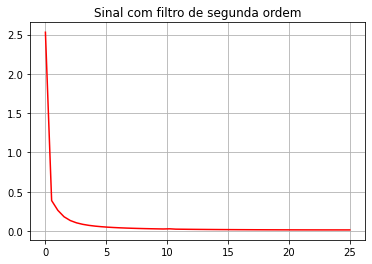

In [20]:
# Plot fft of sinalFiltrado3
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
N = len(sinalFiltrado2)
T = T
yf = scipy.fft.fft(sinalFiltrado2)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color = 'red')
plt.title("Sinal com filtro de segunda ordem")
plt.grid()
plt.show()



In [21]:
#Remover as amostras do periodo de transição
media2 = np.mean(sinalFiltrado2[40:-1])
print("Media do sinal filtrado: ", media2)

Media do sinal filtrado:  1.4909039641700683


In [22]:
Q = 8
W3 = 2*np.pi*100
T2 = 0.0001
Ns = [0,(W3/Q),0]
Ds = [1,(W3/Q), (W3**2)]

In [23]:
b3,a3 = signal.bilinear(Ns, Ds, 1/T2)

In [24]:
print("b3: ", b3)
print("a3: ", a3)

b3:  [ 0.00390779  0.         -0.00390779]
a3:  [ 1.         -1.98825589  0.99218442]


In [25]:
#Calculo manual
K = W3/Q
C0 = 1 + K*T2/2 + ((W3*T2)**2)/4
a12= (((W3*T2)**2)/2 -2)/C0
a22 = (1- (K*T2/2) + ((W3*T2)**2)/4)/C0 
b00 = ((K*T2)/2)/C0
b10 = ((-K*T2)/2)/C0

In [26]:
#printar as variaveis acima
print("a12: ", a12)
print("a22: ", a22)
print("b00: ", b00)
print("b10: ", b10)

a12:  -1.988255886606364
a22:  0.9921844237268778
b00:  0.0039077881365611215
b10:  -0.0039077881365611215


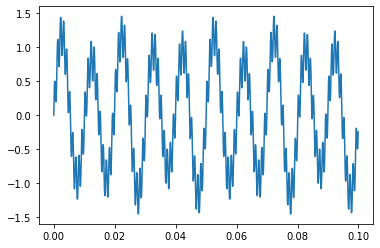

In [27]:
tsim2 = np.arange(0,0.1,T2)
sinal2 = []
for t in tsim2:
    sinal2.append(np.sin(2*np.pi*100*t) + 0.2*np.sin(2*np.pi*60*t) + 0.3*np.sin(2*np.pi*1000*t))

plt.plot(tsim2, sinal2)

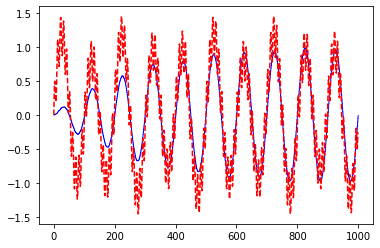

In [28]:
sinalFiltrado3 = signal.lfilter(b3, a3, sinal2) 
#plt.plot(sinalFiltrado3)
plt.plot(sinal2, 'r--')
plt.stairs(sinalFiltrado3, color = 'blue')

C:\Users\joaov\AppData\Local\Temp\ipykernel_1900\762615503.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


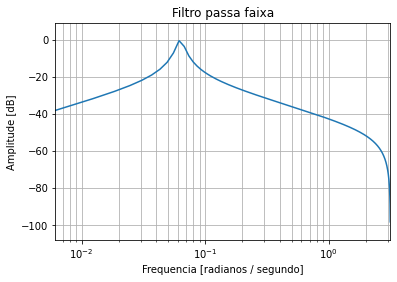

In [29]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(b3, a3)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa faixa')
plt.xlabel('Frequencia [radianos / segundo]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


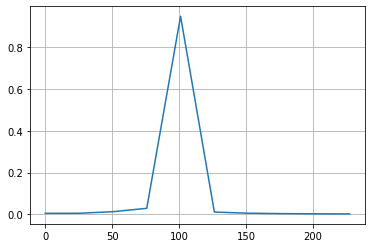

In [30]:
# Plot fft of sinalFiltrado3
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
N = len(sinalFiltrado3[600:-1])
T = T2
yf = scipy.fft.fft(sinalFiltrado3[600:-1])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf[0:10], 2.0/N * np.abs(yf[0:10]))
plt.grid()
plt.show()



Segunda parte, usando comandos

In [110]:
Ts = 0.0001
frange = [80,120] # Banda passante 
b4,a4 = scipy.signal.butter(2, frange, btype='bandpass', analog=False, fs = 1/Ts)

In [32]:
print('b: ', b4)
print('a: ', a4)

b:  [ 0.00015515  0.         -0.0003103   0.          0.00015515]
a:  [ 1.         -3.95695005  5.87912768 -3.8872447   0.96508117]


C:\Users\joaov\AppData\Local\Temp\ipykernel_1900\1070030212.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w*(1/Ts)*0.1592, 20 * np.log10(abs(h)))


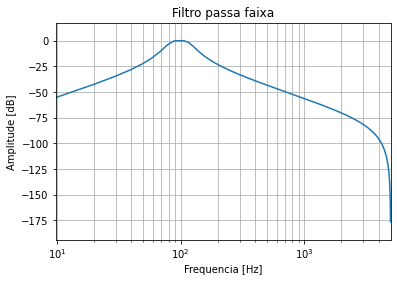

In [111]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(b4, a4)
plt.plot(w*(1/Ts)*0.1592, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa faixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')    
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


In [34]:
sinalFiltrado4 = signal.lfilter(b4, a4, sinal2) 

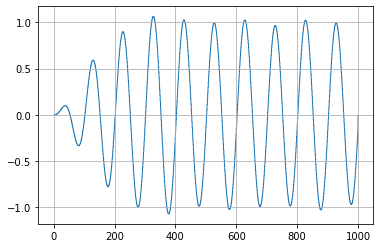

In [35]:
plt.stairs(sinalFiltrado4)
plt.grid()

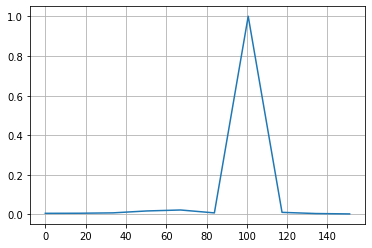

In [36]:
N = len(sinalFiltrado4[400:-1])
T = T2
yf = scipy.fft.fft(sinalFiltrado4[400:-1])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf[0:10], 2.0/N * np.abs(yf[0:10]))
plt.grid()
plt.show()


In [37]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html
minOrd, Wn = scipy.signal.buttord([80/5000,120/5000], [60/5000,140/5000],1,10, fs = 1/Ts)

In [38]:
print(minOrd)

4


In [39]:
Wn

array([0.01542409, 0.02489612])

In [107]:
b5,a5 = scipy.signal.butter(minOrd, Wn, btype= 'bandpass') # Se eu coloco fs aqui nao funciona, imagino que ele normalize de novo

In [41]:
b5

array([ 4.71513711e-08,  0.00000000e+00, -1.88605485e-07,  0.00000000e+00,
        2.82908227e-07,  0.00000000e+00, -1.88605485e-07,  0.00000000e+00,
        4.71513711e-08])

In [42]:
a5

array([  1.        ,  -7.90723318,  27.36960684, -54.1646092 ,
        67.03221979, -53.12175842,  26.32584297,  -7.45925261,
         0.92518381])

C:\Users\joaov\AppData\Local\Temp\ipykernel_1900\2880347807.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w*(1/Ts)*0.1592, 20 * np.log10(abs(h)))


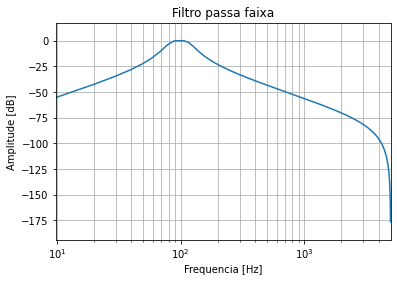

In [108]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(b5, a5)
plt.plot(w*(1/Ts)*0.1592, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa faixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


In [44]:
sinalFiltrado5 = signal.lfilter(b5, a5, sinal2) 

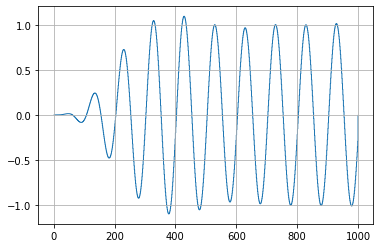

In [45]:
plt.stairs(sinalFiltrado5)
plt.grid()

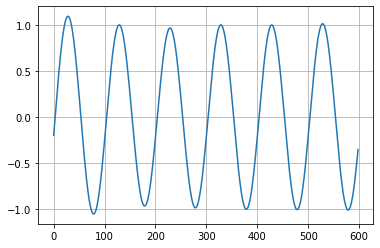

In [46]:
plt.plot(sinalFiltrado5[400:-1])
plt.grid()

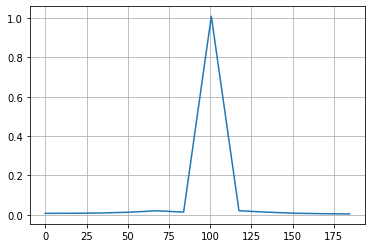

In [47]:
# Pegando o sinal filtrado depois do transitorio
N = len(sinalFiltrado5[400:-1])
T = T2
yf = scipy.fft.fft(sinalFiltrado5[400:-1])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf[0:12], 2.0/N*np.abs(yf[0:12]))
plt.grid()
plt.show()


In [48]:
# Filtro eliptico
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html
minOrd, Wn = scipy.signal.ellipord([80/5000,120/5000], [60/5000,140/5000],1,10, fs = 1/Ts)

In [49]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html
b6,a6 = scipy.signal.ellip(minOrd, 1, 10, Wn, btype= 'bandpass')

In [102]:
1/Ts

10000.0

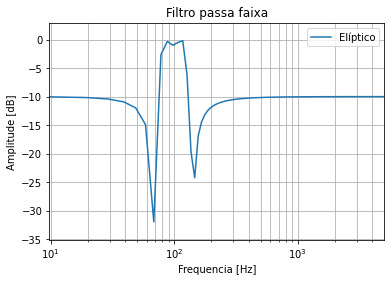

In [105]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(b6, a6)
plt.plot(w*(1/Ts)*0.1592, 20 * np.log10(abs(h)), label ='Elíptico')
'''
w1, h1 = signal.freqz(b4, a4)
plt.plot(w1*(1/Ts)*0.1592, 20 * np.log10(abs(h1)), color = 'orange')
'''

plt.xscale('log')
plt.title('Filtro passa faixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.legend()
plt.show()


In [51]:
sinalFiltrado6 = signal.lfilter(b6, a6, sinal2) 

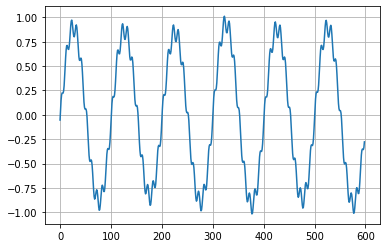

In [52]:
plt.plot(sinalFiltrado6[400:-1])
plt.grid()

Parte 3

In [53]:
numCoef = 51
fsample = 200
srate = 1/fsample

filtkern = signal.firwin(numCoef, cutoff = 40, window = 'blackman', fs = fsample)

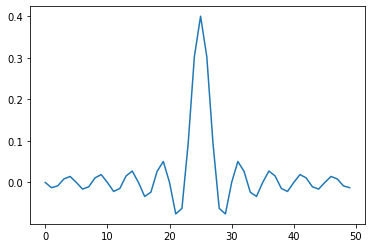

In [54]:
plt.plot((40/100)*np.sinc((40/100)*np.arange(-25,25,1)))

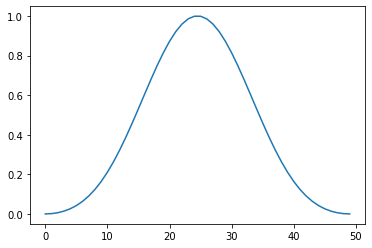

In [55]:
plt.plot(np.blackman(50))

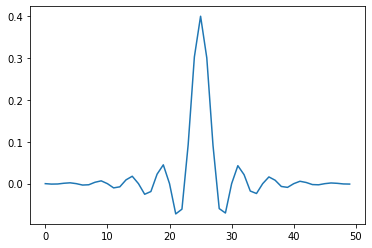

In [56]:
kernel = ((40/100)*np.sinc((40/100)*np.arange(-25,25,1)))*np.hamming(50)
plt.plot(kernel)

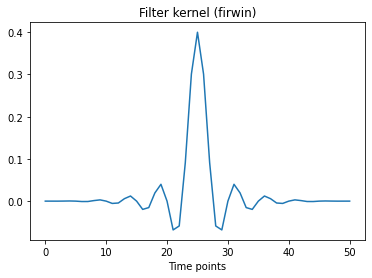

In [57]:
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firwin)')
plt.show()

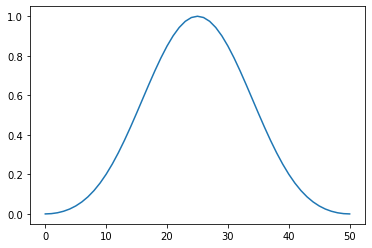

In [58]:
plt.plot(scipy.signal.windows.blackman(numCoef))

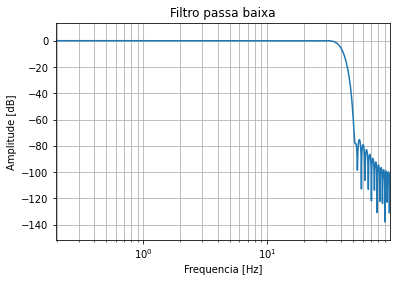

In [99]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(filtkern)
plt.plot(w*200*0.1592, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa baixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


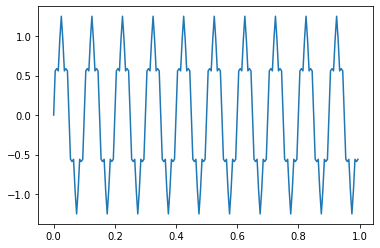

In [60]:
tsim3 = np.arange(0, 1, 1/fsample)
sinal = []
for t in tsim3:
    sinal.append(np.sin(2*np.pi*10*t) + 0.25*np.sin(2*np.pi*50*t))
plt.plot(tsim3, sinal)

In [61]:
sinalFiltrado5 = signal.lfilter(kernel, 1, sinal) 

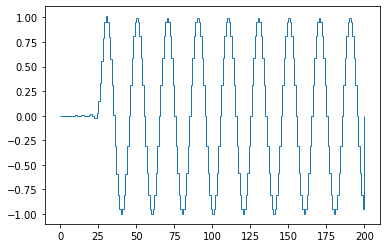

In [62]:
plt.stairs(sinalFiltrado5)

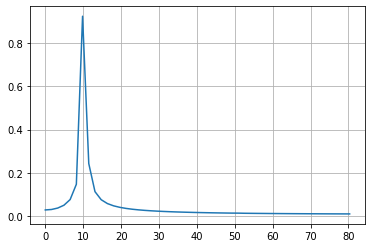

In [63]:
# Pegando o sinal filtrado depois do transitorio
N = len(sinalFiltrado5[75:-1])
T = srate
yf = scipy.fft.fft(sinalFiltrado5[75:-1])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.plot(xf[0:50], 2.0/N*np.abs(yf[0:50]))
plt.grid()
plt.show()


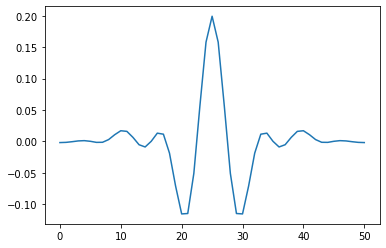

In [64]:
numCoef2 = 51
fsample2 = 200
srate2 = 1/fsample2

filtkern2 = signal.firwin(numCoef2, cutoff = [10, 30], window = 'hamming', fs = fsample2, pass_zero = False)
plt.plot(filtkern2)

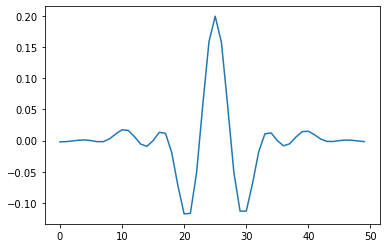

In [91]:
kernel2 = (((30/100)*np.sinc((30/100)*np.arange(-25,25,1)))-((10/100)*np.sinc((10/100)*np.arange(-25,25,1))))*np.hamming(50)
plt.plot(kernel2)

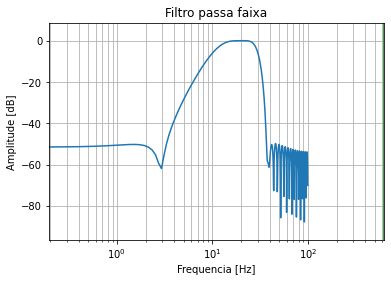

In [101]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(kernel2)
plt.plot(w*200*0.1592, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa faixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(2*np.pi*100, color='green') # cutoff frequency
plt.show()

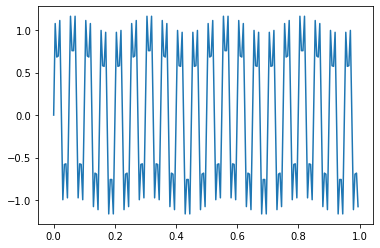

In [66]:
tsim4 = np.arange(0, 1, 1/fsample2)
sinal2 = []
for t in tsim4:
    sinal2.append(0.1*np.sin(2*np.pi*4*t)+ np.sin(2*np.pi*20*t) + 0.5*np.sin(2*np.pi*60*t))
plt.plot(tsim4, sinal2)

In [112]:
sinalFiltrado6 = signal.lfilter(kernel2, 1, sinal2) 

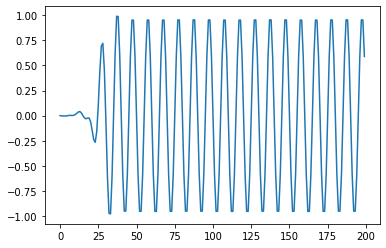

In [114]:
plt.plot(sinalFiltrado6)


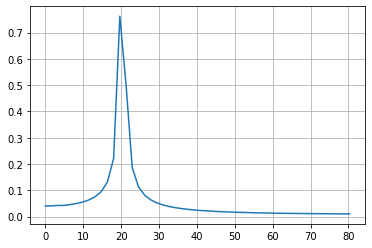

In [119]:
# Pegando o sinal filtrado depois do transitorio
N = len(sinalFiltrado6[75:-1])
T = srate2
yf = scipy.fft.fft(sinalFiltrado6[75:-1])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.plot(xf[0:50], 2.0/N*np.abs(yf[0:50]))
plt.grid()
plt.show()


In [120]:
N = 20
# N precisa ser impar
if N % 2 == 0:
    N = N + 1
freqs = [0,800,1000,4000]
m = [1,1,0,0]

#b7 = signal.firls(N, freqs, m, fs = 8000)

b8 = signal.firwin2(N, freqs, m, fs=8000)

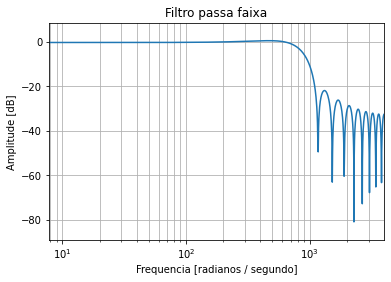

In [122]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(b7,1)
plt.plot(w*(8000)*0.1592, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa faixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


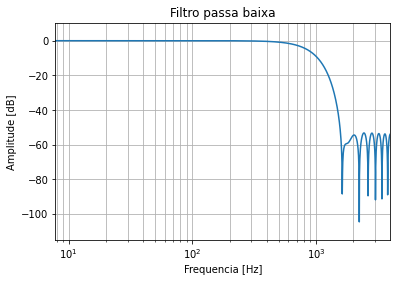

In [126]:
#Calcular a frequencia do sinal filtrado
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, h = signal.freqz(b8,1)
plt.plot(w*(8000)*0.1592, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtro passa baixa')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


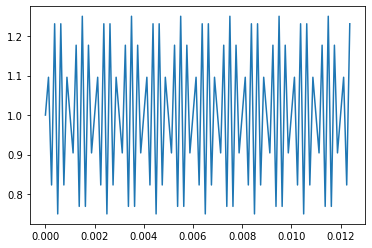

In [127]:
tsim5 = np.arange(0, 0.0125, 1/8000)
sinal3 = []
for t in tsim5:
    sinal3.append(1 + 0.25*np.sin(2*np.pi*3500*t))
plt.plot(tsim5, sinal3)

In [128]:
sinalFiltrado7 = signal.lfilter(b8, 1, sinal3) 

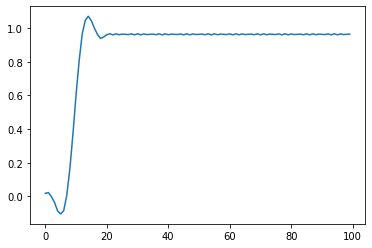

In [74]:
plt.plot(sinalFiltrado7)

In [135]:
len(sinalFiltrado7[20:])

80

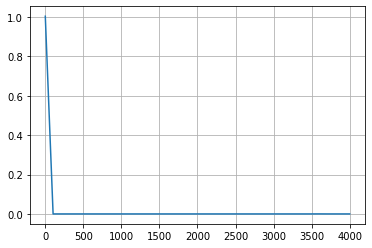

In [139]:
# Pegando o sinal filtrado depois do transitorio
N = len(sinalFiltrado7[20:])
T = 1/8000
yf = scipy.fft.fft(sinalFiltrado7[20:])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.plot(xf, 1.0/N*np.abs(yf[0:N//2]))
plt.grid()
plt.show()
